In [1]:
import clmm

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
from astropy.table import Table
import pickle as pkl
from pathlib import Path
from astropy.io import fits
import fitsio as fio

ModuleNotFoundError: No module named 'fitsio'

In [16]:
CLUSTER_FITS_PATH = "/global/cfs/cdirs/des/zhou/clmm/clmm_on_DES/data/redmapper_y1a1_public_v6.4_catalog.fits"
MEMBER_FITS_PATH = "/global/cfs/cdirs/des/zhou/clmm/clmm_on_DES/data/redmapper_y1a1_public_v6.4_members.fits"
RANDOM_FITS_PATH = "/global/cfs/cdirs/des/zhou/clmm/clmm_on_DES/data/redmapper_y1a1_public_v6.4_randoms.fits"

In [17]:
cluster_table = Table(fits.open(CLUSTER_FITS_PATH)[1].data)
member_table = Table(fits.open(MEMBER_FITS_PATH)[1].data)
random_table = Table(fits.open(RANDOM_FITS_PATH)[1].data)


In [19]:
cluster_table.columns

<TableColumns names=('ID','NAME','RA','DEC','Z_LAMBDA','Z_LAMBDA_ERR','LAMBDA','LAMBDA_ERR','S','Z_SPEC','COADD_OBJECTS_ID','MAG_AUTO_G','MAGERR_AUTO_G','MAG_AUTO_R','MAGERR_AUTO_R','MAG_AUTO_I','MAGERR_AUTO_I','MAG_AUTO_Z','MAGERR_AUTO_Z','ZLUM','P_CEN','RA_CEN','DEC_CEN','ID_CEN','PZBINS','PZ')>

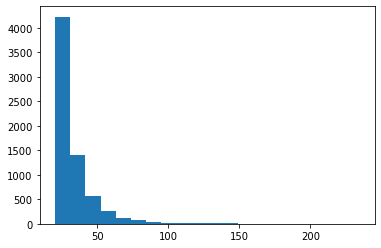

In [28]:
plt.hist(cluster_table['LAMBDA'], bins=20);

In [34]:
cluster_table.sort('LAMBDA')
cluster_table.reverse()
z_mask = np.logical_and(cluster_table['Z_LAMBDA'] > 0.3, cluster_table['Z_LAMBDA'] < 0.6)

In [35]:
cluster_table[z_mask]

ID,NAME,RA,DEC,Z_LAMBDA,Z_LAMBDA_ERR,LAMBDA,LAMBDA_ERR,S,Z_SPEC,COADD_OBJECTS_ID,MAG_AUTO_G,MAGERR_AUTO_G,MAG_AUTO_R,MAGERR_AUTO_R,MAG_AUTO_I,MAGERR_AUTO_I,MAG_AUTO_Z,MAGERR_AUTO_Z,ZLUM,P_CEN [5],RA_CEN [5],DEC_CEN [5],ID_CEN [5],PZBINS [21],PZ [21]
int32,str20,float64,float64,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32
1,RMJ025415.5-585710.7,43.564574,-58.95297,0.429804,0.012092354,234.50368,7.524398,1.0567604,-1.0,3089939451,20.175312,0.01691545,18.321383,0.008135756,17.693726,0.008199731,17.325676,0.008411231,-1.0,0.9991055 .. 6.590104e-05,43.564575 .. 43.557,-58.95297 .. -58.939064,3089939451 .. 3089940037,0.36146685 .. 0.4981411,4.062646e-06 .. 2.3250898e-06
2,RMJ051637.4-543001.6,79.155704,-54.500456,0.30416065,0.007928145,195.06956,6.777896,1.0545249,-1.0,3047101906,19.667797,0.0067870687,17.954527,0.0021536204,17.444197,0.0021800548,17.169514,0.0028993362,-1.0,0.8244598 .. 2.1973678e-05,79.1557 .. 79.16356,-54.500458 .. -54.52652,3047101906 .. 3047099245,0.25879675 .. 0.34952456,7.912388e-06 .. 3.3386082e-06
5,RMJ224851.8-443106.3,342.215897,-44.518403,0.3514858,0.010535383,178.83827,8.7123,1.1754017,-1.0,3138662814,19.863644,0.008220169,18.214876,0.0039397366,17.675528,0.003998268,17.349815,0.005363237,-1.0,0.50827235 .. 0.0016751448,342.2159 .. 342.17935,-44.518402 .. -44.532623,3138662814 .. 3138662231,0.28765273 .. 0.41531885,4.608477e-08 .. 2.238404e-06
3,RMJ041111.0-481939.6,62.795694,-48.327672,0.41936922,0.0126486905,174.4601,5.073172,1.0207323,-1.0,3069562192,19.57539,0.0097799525,17.845314,0.0045951866,17.2277,0.0046880525,16.868717,0.005000044,-1.0,0.9990237 .. 6.464364e-07,62.795692 .. 62.84126,-48.32767 .. -48.31802,3069562192 .. 3069562335,0.3485327 .. 0.4902058,4.3809223e-06 .. 4.7627004e-06
12,RMJ203510.7-525123.2,308.794628,-52.856438,0.52620196,0.006566591,160.334,6.451848,1.0458225,-1.0,3157162066,21.725101,0.03314218,20.020185,0.014777467,19.231045,0.013324427,18.819477,0.016204402,-1.0,0.819629 .. 0.029692747,308.79462 .. 308.7884,-52.856438 .. -52.854816,3157162066 .. 3157162109,0.48873544 .. 0.5636685,3.2620524e-06 .. 3.7363925e-06
4,RMJ024524.8-530145.4,41.353375,-53.029288,0.30112934,0.007854857,146.2384,4.0440307,1.0090224,-1.0,3092286075,18.86145,0.0067323875,17.305017,0.003943404,16.79262,0.0041245758,16.46946,0.0051363693,-1.0,0.9967264 .. 2.012041e-06,41.353374 .. 41.40372,-53.02929 .. -53.046795,3092286075 .. 3092283521,0.25603127 .. 0.3462274,8.695419e-06 .. 2.9346218e-06
17,RMJ234447.5-424352.3,356.197831,-42.731201,0.5911942,0.007976438,144.8807,5.51211,1.0255624,-1.0,3129061131,22.750273,0.049876068,20.869778,0.018141732,19.897768,0.022519704,19.41929,0.017377643,-1.0,0.74780816 .. 0.024859807,356.19785 .. 356.18735,-42.7312 .. -42.72735,3129061131 .. 3129061248,0.5417897 .. 0.64059865,1.1417643e-08 .. 5.748652e-06
10,RMJ213512.1-010258.5,323.800394,-1.04959,0.32642642,0.008996381,141.08221,5.9649954,1.0744022,-1.0,3010448045,18.580114,0.007509038,16.984154,0.0050856336,16.433153,0.0049757827,16.105667,0.005426338,-1.0,0.99995905 .. 7.267292e-06,323.80038 .. 323.81174,-1.04959 .. -1.038666,3010448045 .. 3010451270,0.27381036 .. 0.37904242,1.6013972e-06 .. 7.143569e-06
21,RMJ004103.6-442958.7,10.265017,-44.499638999999995,0.3478976,0.010397791,139.9381,7.4948587,1.142297,-1.0,3119773430,19.854128,0.00896411,18.226444,0.0066343877,17.686216,0.0067402385,17.392765,0.00715903,-1.0,0.56688815 .. 0.01179698,10.265017 .. 10.259049,-44.499638 .. -44.490196,3119773430 .. 3119773873,0.28333217 .. 0.412463,1.55002e-08 .. 1.7606976e-06


In [21]:
member_table.columns

<TableColumns names=('ID','RA','DEC','R','P','P_FREE','THETA_I','THETA_R','MAG_AUTO_G','MAGERR_AUTO_G','MAG_AUTO_R','MAGERR_AUTO_R','MAG_AUTO_I','MAGERR_AUTO_I','MAG_AUTO_Z','MAGERR_AUTO_Z','Z_SPEC','COADD_OBJECTS_ID')>

In [22]:
random_table.columns

<TableColumns names=('RA','DEC','Z','LAMBDA','WEIGHT')>

In [2]:
SHAPE_PATH = "/global/cfs/cdirs/des/zhou/clmm/clmm_on_DES/data/mcal-y1a1-combined-riz-unblind-v4-matched.fits"

In [ ]:
mcal_column_names = [
    "e1", "e2", "ra", "dec", "coadd_objects_id", "flags_select"
]

mcal_fits = fio.FITS(MCAL_PATH)

shape = mcal_fits[1].read(
    columns=mcal_column_names).byteswap().newbyteorder()

print("Shape catalog loaded")


# Running CLMM on the dataset

In [6]:
from clmm import Cosmology
cosmo = Cosmology(H0=70.0, Omega_dm0=0.27-0.045, Omega_b0=0.045, Omega_k0=0.0)